<a href="https://colab.research.google.com/github/Venkats-AI-codes/AI_practices/blob/main/Agglomerative_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_blobs

In [2]:
x, _ = make_blobs(n_samples=30, centers=3, cluster_std=10, random_state=42)
x

array([[ -7.20394148,  14.43988656],
       [-10.14534107,  -5.2252724 ],
       [ -6.87005694,   5.73014987],
       [ -1.37718729,  20.49595153],
       [ 12.14729007,   6.75652312],
       [-12.63750883,  12.15675945],
       [ 12.02454464,   3.6868525 ],
       [-11.4860149 ,   3.69111267],
       [ -0.08957491, -10.11851632],
       [ -3.4434443 , -24.51051115],
       [  3.48339601,  -1.03786727],
       [ -3.6387875 , -10.7309324 ],
       [ -1.36650806,  -0.94376781],
       [  6.72851479, -17.62353155],
       [ -7.95302487,  10.12351203],
       [ -8.64198165,   3.94178204],
       [  3.43036803,   2.4326916 ],
       [ -1.83391558,  -5.23319573],
       [-11.58943838,  -5.10875089],
       [-13.64884719,  -0.7633467 ],
       [-15.27180242,  -9.97223335],
       [-11.67136957,  -8.73669936],
       [  1.24563103,   6.68229069],
       [  4.50490659,  -8.60393961],
       [ 12.86532796, -10.23526682],
       [-19.75837595,   3.39141084],
       [-17.94297693, -18.84217583],
 

In [4]:
clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit_predict(x)

array([1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2,
       0, 0, 0, 1, 2, 0, 1, 1])

In [5]:
agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg.fit(x)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [6]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

/tmp/ipython-input-1876067747.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(x[:, 0], x[:, 1], cmap='viridis', s=70)


Text(0, 0.5, 'Feature 2')

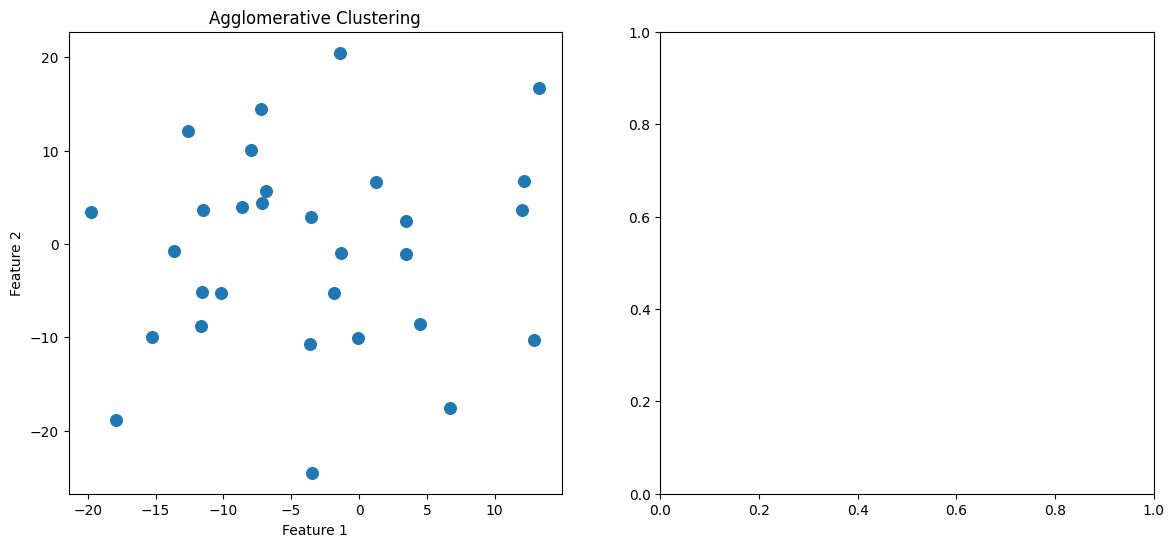

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(x[:, 0], x[:, 1], cmap='viridis', s=70)
ax1.set_title("Agglomerative Clustering")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

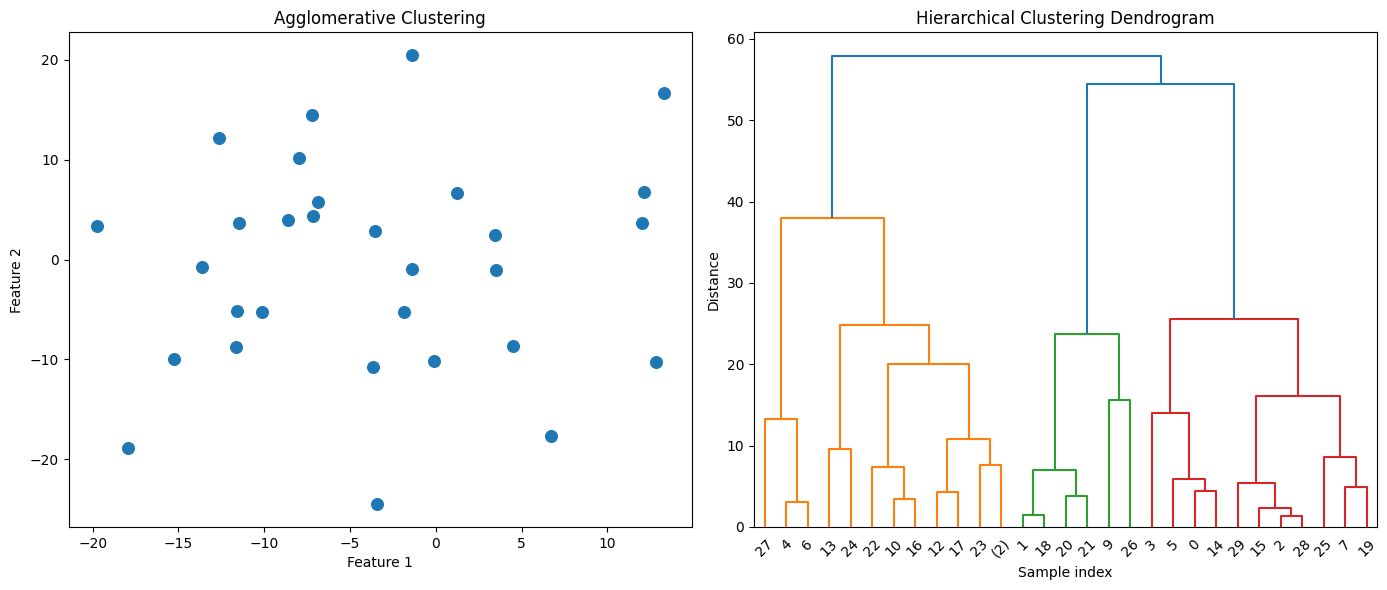

In [12]:
plt.sca(ax2)
plot_dendrogram(agg, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")

plt.tight_layout()
plt.show()